I followed the methods from Chapters 3 and 4. I decomposed the PBS data to observe trend and seasonality, extracted features, and completed Exercise 1 by identifying the series with the highest mean and lowest variation.


**1. TIME SERIES DECOMPOSITION WITH USING PBS_unparsed DATASET**

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Load dataset
df = pd.read_csv("/content/PBS_unparsed.csv")
df['Month'] = pd.to_datetime(df['Month'])       # Converting Month column to datetime format
df.head()

# List of available categories (ATC2)
df['ATC2'].unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A09', 'A10',
       'A11', 'A12', 'A14', 'A15', 'B01', 'B02', 'B03', 'B05', 'C01',
       'C02', 'C03', 'C04', 'C05', 'C07', 'C08', 'C09', 'C10', 'D', 'D01',
       'D02', 'D04', 'D05', 'D06', 'D07', 'D08', 'D10', 'D11', 'G01',
       'G02', 'G03', 'G04', 'H01', 'H02', 'H03', 'H04', 'H05', 'J01',
       'J02', 'J04', 'J05', 'J06', 'J07', 'L01', 'L02', 'L03', 'L04',
       'M01', 'M02', 'M03', 'M04', 'M05', 'N02', 'N03', 'N04', 'N05',
       'N06', 'N07', 'P01', 'P02', 'P03', 'R', 'R01', 'R03', 'R05', 'R06',
       'S', 'S01', 'S02', 'S03', 'V01', 'V03', 'V04', 'V06', 'V07', 'Z'],
      dtype=object)

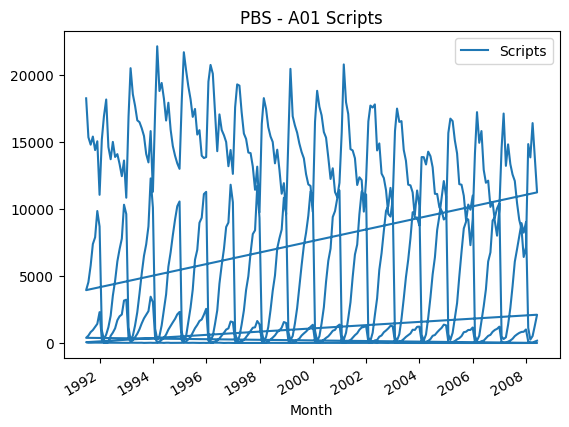

In [37]:
# Selecting a single time series from the PBS data (A01)
series = df[df["ATC2"]=="A01"].set_index("Month")["Scripts"]

series = series.reset_index().set_index('Month')

# Plotting time series to visualize data
series.plot(title="PBS - A01 Scripts")
plt.show()


- The PBS dataset includes many categories, so I only needed to select one time series for decomposition.

- I chose A01 because it has enough observations and shows both trend and seasonality, which makes it suitable for decomposition.

**Moving Average, with following Chapter 3.3**

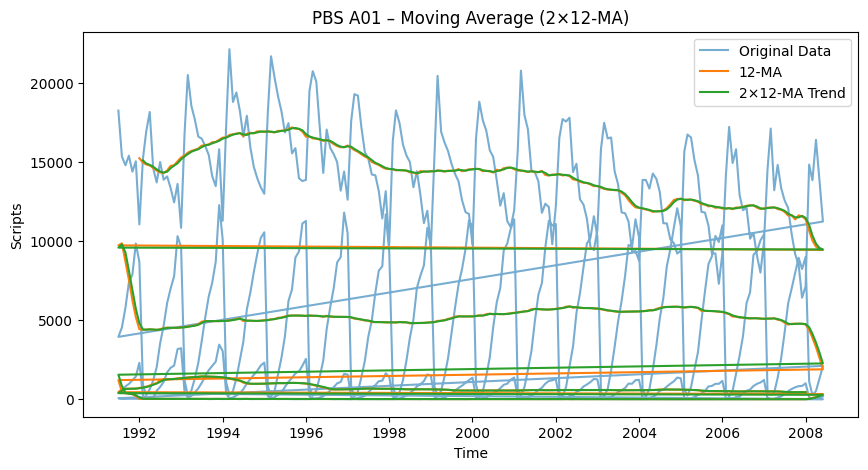

In [38]:
# 12-month moving average (centered)
ma12 = series.rolling(window=12, center=True).mean()

# Applying smoothing again (2 × 12-MA)
ma2 = ma12.rolling(window=2, center=True).mean()

# Plot both original data and smoothed trend
plt.figure(figsize=(10,5))
plt.plot(series.index, series.values, label='Original Data', alpha=0.6)   # raw PBS data
plt.plot(series.index, ma12, label='12-MA')                               # first moving average
plt.plot(series.index, ma2, label='2×12-MA Trend')                        # smoother trend

plt.title("PBS A01 – Moving Average (2×12-MA)")
plt.xlabel("Time")
plt.ylabel("Scripts")
plt.legend()
plt.show()


I first applied a 12-month moving average to smooth the series. Then I used a 2×12-MA to obtain a clearer trend. This method helps reduce seasonal fluctuations.

**Classical Decomposition, with following Chapter 3.4**

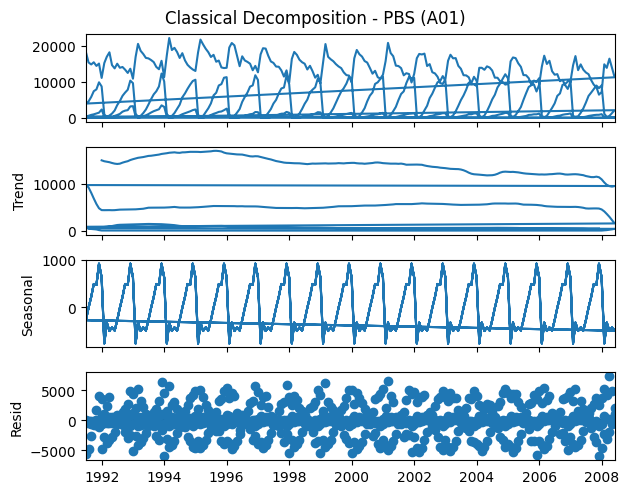

In [39]:
#Classical additive decomposition
result = seasonal_decompose(series, model='additive', period=12)

# Plotting the components (Trend, Seasonal, Residual)
result.plot()
plt.suptitle("Classical Decomposition - PBS (A01)", y=1.02)
plt.show()


I applied an additive classical decomposition (period = 12) to separate the PBS A01 series into trend, seasonality, and residuals. This helps observe the seasonal pattern clearly.

**STL Decomposition with following Chapter 3.6**

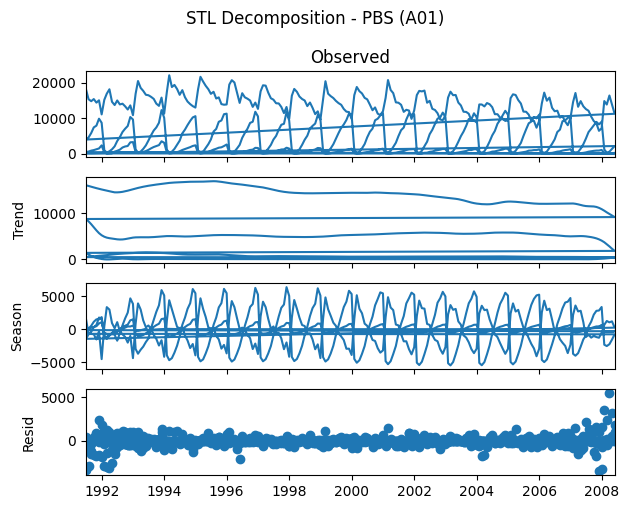

In [40]:
#STL decomposition
stl = STL(series, period=12)
res = stl.fit()

# Plotting all components
res.plot()
plt.suptitle("STL Decomposition - PBS (A01)", y=1.05)
plt.show()


I used STL decomposition with yearly seasonality (period = 12), following Chapter 3.6. It clearly separates trend, seasonality and residual components.

**2. TIME SERIES FEAUTURES**

**4.1 Some simple statistics**

In [41]:
stats = {
    "mean": series.mean(),
    "median": series.median(),
    "std": series.std(),
    "min": series.min(),
    "max": series.max(),
}
print(stats)


{'mean': Scripts    5037.198529
 dtype: float64,
 'median': Scripts    1114.0
 dtype: float64,
 'std': Scripts    6209.462526
 dtype: float64,
 'min': Scripts    0
 dtype: int64,
 'max': Scripts    22105
 dtype: int64}

The basic statistics show that the PBS A01 series has a mean of around 5000 and a median of 1114, indicating that distribution is right-skewed.
The standard deviation is fairly high (6209), the series changes a lot over time.
The minimum value is 0, which might be due to seasonal effects or months with very low activity.


**4.2 ACF Feautures**

In [50]:
!pip install tsfeatures
from tsfeatures import acf_features

acf_feat = acf_features(series, freq=12)
print(acf_feat)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 22.3 MB/s eta 0:00:00
  Created wheel for supersmoother: filename=supersmoother-0.4-py3-none-any.whl size=16146 sha256=222620ec648148262ecf22226c6b75a749ee2f222fa3979106848451022ac22b
  Stored in directory: /root/.cache/pip/wheels/69/4a/ff/05c85ded597955df839bedebe6dca56297c2568c04881d2e70
Successfully built supersmoother
{'x_acf1': np.float64(0.9483921795181042), 'x_acf10': np.float64(6.721244745725329), 'diff1_acf1': np.float64(0.12168550079012502), 'diff1_acf10': np.float64(0.18697314923013544), 'diff2_acf1': np.float64(-0.3915628470504467), 'diff2_acf10': np.float64(0.19614586531118172), 'seas_acf1': np.float64(0.9456380603990606)}


The ACF results show strong autocorrelation at lag 1 (x_acf1 ≈ 0.94).The seasonal ACF (seas_acf1 ≈ 0.94) also confirms clear seasonality in the data.


**4.3 STL Feautures**

In [51]:
from tsfeatures import stl_features

stl_feat = stl_features(series, freq=12)
print(stl_feat)


{'nperiods': 1, 'seasonal_period': 12, 'trend': np.float64(0.980557449907324), 'spike': np.float64(8356366.636728757), 'linearity': np.float64(-144581.23281788835), 'curvature': np.float64(65030.21566153459), 'e_acf1': np.float64(0.4739536156144284), 'e_acf10': np.float64(0.8473407330609221), 'seasonal_strength': np.float64(0.881307531429224), 'peak': np.int64(6), 'trough': np.int64(9)}


STL results suggest strong seasonality (seasonal_strength ≈ 0.88).
The series usually peaks around month 6 and is lowest around month 9.


In [53]:
acf_df = pd.DataFrame([acf_feat])
stl_df = pd.DataFrame([stl_feat])

feature_table = pd.concat([acf_df, stl_df], axis=1)
print(feature_table)



     x_acf1   x_acf10  diff1_acf1  diff1_acf10  diff2_acf1  diff2_acf10  \
0  0.948392  6.721245    0.121686     0.186973   -0.391563     0.196146   

   seas_acf1  nperiods  seasonal_period     trend         spike  \
0   0.945638         1               12  0.980557  8.356367e+06   

       linearity     curvature    e_acf1   e_acf10  seasonal_strength  peak  \
0 -144581.232818  65030.215662  0.473954  0.847341           0.881308     6   

   trough  
0       9  


**EXERCISE 1 FROM CH 4**


In [54]:
groups = df.groupby("ATC2")


In [55]:
def mean_std(series):
    return series.mean(), series.std()


In [56]:
#Calculating for all series
results = []

for name, group in groups:
    y = group["Scripts"]
    mu, sigma = mean_std(y)
    results.append([name, mu, sigma])

results_df = pd.DataFrame(results, columns=["Series", "Mean", "Std"])
print(results_df.head())


,Series,Mean,Std
0,A01,5037.198529,6209.462526
1,A02,196669.137255,197757.503016
2,A03,17851.860294,20314.994429
3,A04,16457.612745,19071.773113
4,A05,364.054688,327.059507


In [57]:
#Finding  highest mean, and lowest standard deviation
highest_mean_id = results_df.loc[results_df["Mean"].idxmax(), "Series"]
lowest_std_id  = results_df.loc[results_df["Std"].idxmin(), "Series"]
print("Highest Mean Series:", highest_mean_id)
print("Lowest Standard Deviation Series:", lowest_std_id)


('C09', 'J06')

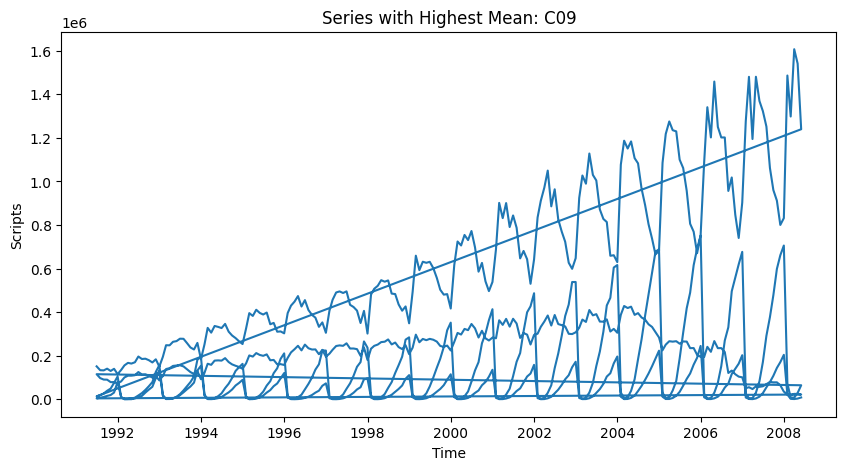

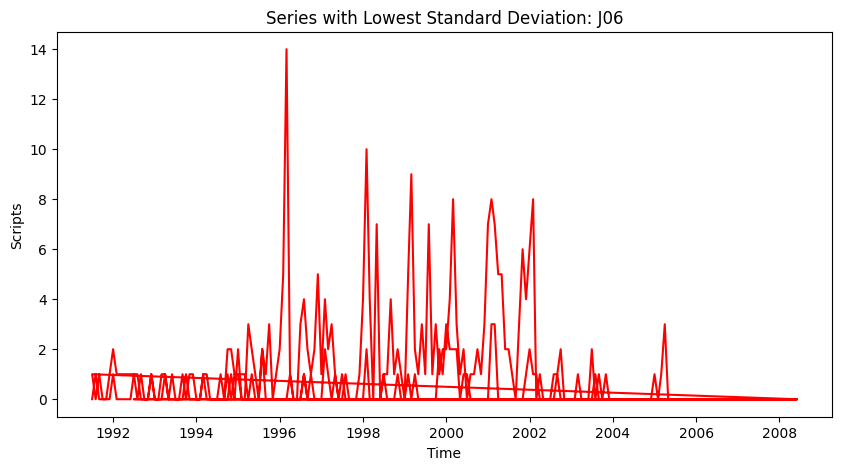

In [58]:
#Series with Highest Mean
high_series = df[df["ATC2"] == highest_mean_id]
plt.figure(figsize=(10,5))
plt.plot(high_series["Month"], high_series["Scripts"])
plt.title(f"Series with Highest Mean: {highest_mean_id}")
plt.xlabel("Time")
plt.ylabel("Scripts")
plt.show()

#Series with Lowest Standard Deviation
low_series = df[df["ATC2"] == lowest_std_id]
plt.figure(figsize=(10,5))
plt.plot(low_series["Month"], low_series["Scripts"], color="red")
plt.title(f"Series with Lowest Standard Deviation: {lowest_std_id}")
plt.xlabel("Time")
plt.ylabel("Scripts")
plt.show()


The C09 series has the highest average value, which suggests strong prescription demand. It also shows a clear upward trend and noticeable seasonality.

The J06 series stays mostly at a low level and does not show a clear seasonal pattern. Overall, the changes are small.